<h1> SD201 - Mining of Large Datasets </h1>
<h2> Effects of alcohol on academic performance</h2>
Carlos Eduardo Jedwab<br>
Daniel Victor Ferreira da Silva<br>
Leonel Mota Sampaio Durão<br>
Luiz Augusto Facury de Souza

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data/Portuguese.csv')

In [3]:
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
data.describe().T

count       mean       std   min   25%   50%   75%   max
age         649.0  16.744222  1.218138  15.0  16.0  17.0  18.0  22.0
Medu        649.0   2.514638  1.134552   0.0   2.0   2.0   4.0   4.0
Fedu        649.0   2.306626  1.099931   0.0   1.0   2.0   3.0   4.0
traveltime  649.0   1.568567  0.748660   1.0   1.0   1.0   2.0   4.0
studytime   649.0   1.930663  0.829510   1.0   1.0   2.0   2.0   4.0
failures    649.0   0.221880  0.593235   0.0   0.0   0.0   0.0   3.0
famrel      649.0   3.930663  0.955717   1.0   4.0   4.0   5.0   5.0
freetime    649.0   3.180277  1.051093   1.0   3.0   3.0   4.0   5.0
goout       649.0   3.184900  1.175766   1.0   2.0   3.0   4.0   5.0
Dalc        649.0   1.502311  0.924834   1.0   1.0   1.0   2.0   5.0
Walc        649.0   2.280431  1.284380   1.0   1.0   2.0   3.0   5.0
health      649.0   3.536210  1.446259   1.0   2.0   4.0   5.0   5.0
absences    649.0   3.659476  4.640759   0.0   0.0   2.0   6.0  32.0
G1          649.0  11.399076  2.745265   0.0  10.0  11.0  13.0  19.0
G2          649.0  11.570108  2.913639   0.0  10.0  11.0  13.0  19.0
G3          649.0  11.906009  3.230656   0.0  10.0  12.0  14.0  19.0

In [6]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

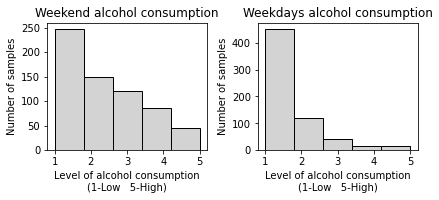

In [7]:
plt.subplot(1, 2, 1)
plt.hist(data.Walc, 5, edgecolor='k', color="lightgray")
plt.title('Weekend alcohol consumption')
plt.xlabel('Level of alcohol consumption\n(1-Low   5-High)')
plt.ylabel('Number of samples')


plt.subplot(1, 2, 2)
plt.hist(data.Dalc, 5, edgecolor='k', color="lightgray")
plt.title('Weekdays alcohol consumption')
plt.xlabel('Level of alcohol consumption\n(1-Low   5-High)')
plt.ylabel('Number of samples')

plt.tight_layout(rect=[0, 0.03, 1, 0.75])
plt.show()

plt.subplot(1, 3, 1)
plt.hist(data.G1, 20, edgecolor='k', color="lightgray")
plt.title('Grades 1 distribution')
plt.xlabel('average grades')
plt.ylabel('Number of samples')


plt.subplot(1, 3, 2)
plt.hist(data.G2, 20, edgecolor='k', color="lightgray")
plt.title('Grades 2 distribution')
plt.xlabel('average grades')
plt.ylabel('Number of samples')

plt.subplot(1, 3, 3)
plt.hist(data.G3, 20, edgecolor='k', color="lightgray")
plt.title('Grades 3 distribution')
plt.xlabel('average grades')
plt.ylabel('Number of samples')

plt.tight_layout(rect=[0, 0.03, 2, 0.75])
plt.show()

In [8]:
data = pd.read_csv('data/Portuguese.csv')
data.replace(['GP','MS'], [0,1], inplace=True) #Gabriel Pereira=0, Mousinho da Silveira=1
data.replace(['M', 'F'], [0,1], inplace=True)  #Masculine = 0, Feminine = 1
data.replace(['U', 'R'], [0,1], inplace=True)  #Urban = 0, Rural = 1
data.replace(['LE3', 'GT3'], [0,1], inplace=True) # Family size - less or equal to 3 = 0, greater than 3 = 1
data.replace(['T','A'], [0,1], inplace=True)   # Parents living together = 0, apart = 1
data.replace(['teacher', 'health', 'services', 'at_home', 'other'], [0,1,2,3,4], inplace=True) #Parents working
data.replace(['home', 'reputation', 'course'], [0,1,2], inplace=True)
data.replace(['mother', 'father'], [0,1], inplace=True)
data.replace(['yes','no'],[0,1], inplace=True)  #Paid, activity, nursery, wants  higher education, internet and romantic

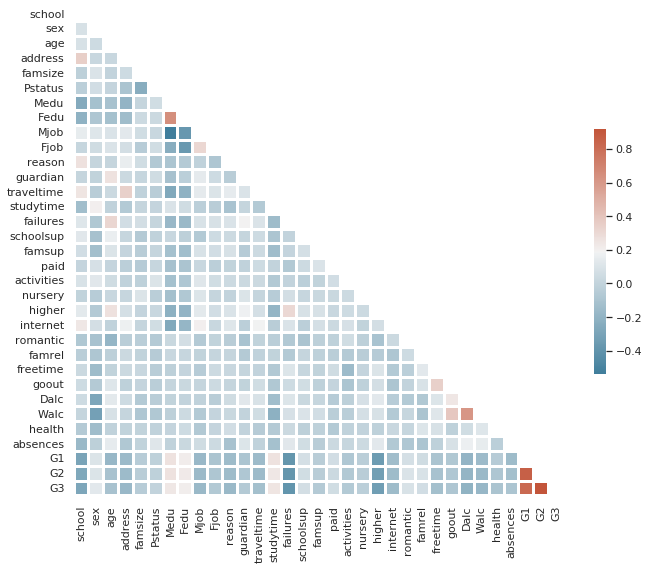

In [9]:
import seaborn as sns
corr = data.corr()
sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=2, cbar_kws={"shrink": .5})

In [10]:
corr

school       sex       age   address   famsize   Pstatus  \
school      1.000000  0.083050  0.087170  0.354520 -0.022252 -0.028120   
sex         0.083050  1.000000  0.043662  0.025503  0.098205  0.064700   
age         0.087170  0.043662  1.000000  0.025848  0.002470  0.005631   
address     0.354520  0.025503  0.025848  1.000000  0.046113 -0.094635   
famsize    -0.022252  0.098205  0.002470  0.046113  1.000000 -0.239608   
Pstatus    -0.028120  0.064700  0.005631 -0.094635 -0.239608  1.000000   
Medu       -0.254787 -0.119127 -0.107832 -0.190320  0.014325  0.057174   
Fedu       -0.209806 -0.083913 -0.121050 -0.141493  0.039538  0.031856   
Mjob        0.151608  0.114223  0.096202  0.128512  0.059604  0.025812   
Fjob        0.018211  0.054325  0.094789  0.069587 -0.045834  0.057947   
reason      0.266147  0.014094  0.013001  0.157734  0.058012 -0.065560   
guardian    0.011635 -0.006472  0.262366  0.032634  0.019440  0.051001   
traveltime  0.252936 -0.040880  0.034490  0.344902 -0.012794 -0.040633   
studytime  -0.137857  0.206214 -0.008415 -0.062023  0.010945  0.008748   
failures    0.113788 -0.073888  0.319968  0.063824  0.066068  0.009881   
schoolsup   0.123340 -0.111202  0.167841  0.017956 -0.056405 -0.009456   
famsup      0.063720 -0.129467  0.101894  0.005577 -0.039819  0.010203   
paid        0.007905  0.079300  0.005458 -0.030483 -0.050253  0.015923   
activities  0.088604  0.124707  0.054279 -0.009278 -0.014790  0.101555   
nursery    -0.004659 -0.043603  0.021441  0.018077  0.100686 -0.032724   
higher      0.136112 -0.058134  0.265497  0.076706  0.004523  0.022726   
internet    0.240486  0.065911 -0.013115  0.175794  0.013357  0.059754   
romantic   -0.072241 -0.110144 -0.178810 -0.030939 -0.032936 -0.053828   
famrel     -0.031597 -0.083473 -0.020559  0.033897 -0.004641 -0.051303   
freetime    0.034666 -0.146305 -0.004910  0.036647  0.021257 -0.037585   
goout       0.044632 -0.058178  0.112805 -0.015475  0.004312 -0.031086   
Dalc        0.047169 -0.282696  0.134768  0.047304 -0.060482 -0.041513   
Walc        0.014169 -0.320785  0.086357  0.012416 -0.081958 -0.070976   
health     -0.058599 -0.139547 -0.008750 -0.003787 -0.002448 -0.012638   
absences   -0.163933 -0.021336  0.149998 -0.073653 -0.004645  0.117492   
G1         -0.292626  0.104109 -0.174322 -0.157127 -0.047230 -0.015251   
G2         -0.269776  0.104005 -0.107119 -0.154600 -0.038891 -0.018689   
G3         -0.284294  0.129077 -0.106505 -0.167637 -0.045016  0.000754   

                Medu      Fedu      Mjob      Fjob  ...    famrel  freetime  \
school     -0.254787 -0.209806  0.151608  0.018211  ... -0.031597  0.034666   
sex        -0.119127 -0.083913  0.114223  0.054325  ... -0.083473 -0.146305   
age        -0.107832 -0.121050  0.096202  0.094789  ... -0.020559 -0.004910   
address    -0.190320 -0.141493  0.128512  0.069587  ...  0.033897  0.036647   
famsize     0.014325  0.039538  0.059604 -0.045834  ... -0.004641  0.021257   
Pstatus     0.057174  0.031856  0.025812  0.057947  ... -0.051303 -0.037585   
Medu        1.000000  0.647477 -0.536829 -0.236021  ...  0.024421 -0.019686   
Fedu        0.647477  1.000000 -0.376360 -0.363574  ...  0.020256  0.006841   
Mjob       -0.536829 -0.376360  1.000000  0.313979  ... -0.002603 -0.045453   
Fjob       -0.236021 -0.363574  0.313979  1.000000  ...  0.013539  0.040034   
reason     -0.091811 -0.057348 -0.013613 -0.086771  ...  0.011576  0.025720   
guardian   -0.115260 -0.028207  0.142149  0.047097  ... -0.054673  0.014396   
traveltime -0.265079 -0.208288  0.143728  0.102847  ... -0.009521  0.000937   
studytime   0.097006  0.050400 -0.027832 -0.037830  ... -0.004127 -0.068829   
failures   -0.172210 -0.165915  0.089040  0.083033  ... -0.062645  0.108995   
schoolsup   0.022168 -0.023572 -0.063127  0.046903  ...  0.012038  0.015611   
famsup     -0.120491 -0.135191  0.092705  0.063976  ... -0.015228 -0.003764   
paid       -0.113973 -0.094628  0.022049 -0.027030  ... -0.031937  0.049574

<h1>Clustering</h1>

First, we need to normalize the data to insure that the result is not biased towards some column. Also, we need to encode numericaly the categorical column, we'll use 1-hot encoding for that. Then we need to decide how many clusters we want in the KMeans algorithm. For that, we'll use the 'elbow method' to pick a good trade-off between the inertia and number of clusters. For the inital points in the KMeans algorithm we use the KMeans++.

In [37]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

norm_data = pd.get_dummies(data)
norm_data['G'] = norm_data['G1'] + norm_data['G2'] + norm_data['G3']
norm_data_filteredW = norm_data.loc[:, ['Walc', 'G']]
norm_data_filteredD = norm_data.loc[:, ['Dalc', 'G']]
print(norm_data.head())

scaler = MinMaxScaler()
scaler.fit(norm_data)
norm_data = scaler.transform(norm_data)

scaler.fit(norm_data_filteredW)
norm_data_filteredW = scaler.transform(norm_data_filteredW)
scaler.fit(norm_data_filteredD)
norm_data_filteredD = scaler.transform(norm_data_filteredD)

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    1   18        0        1        1     4     4     3     0  ...   
1       0    1   17        0        1        0     1     1     3     4  ...   
2       0    1   15        0        0        0     1     1     3     4  ...   
3       0    1   15        0        1        0     4     2     1     2  ...   
4       0    1   16        0        1        0     3     3     4     4  ...   

   freetime  goout  Dalc  Walc  health  absences  G1  G2  G3   G  
0         3      4     1     1       3         4   0  11  11  22  
1         3      3     1     1       3         2   9  11  11  31  
2         3      2     2     3       3         6  12  13  12  37  
3         2      2     1     1       5         0  14  14  14  42  
4         3      2     1     2       5         0  11  13  13  37  

[5 rows x 34 columns]


In [18]:
max_clusters = 100
step = 5
inertia = []

for n_clusters in range(1,max_clusters+1, step):
    km = KMeans(n_clusters=n_clusters, init='k-means++')
    km.fit(norm_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(10,8))
plt.plot(np.arange(1, max_clusters+1, step), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.ylim(ymin=0, ymax=2500)

(0, 2500)

We can see that as we continue to increse the number of clusters, the inertia continues to decrease. This may be an indicator that our data is not easily divided into clusters. Nevertheless, the biggest decrease is until about 10 clusters, and that's a number that is still reasonable.

In [19]:
n_clusters = 10
clustered_data = KMeans(n_clusters=n_clusters).fit_predict(norm_data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(norm_data)

plt.figure(figsize=(10,8))
plt.scatter(pca_data[:,0], pca_data[:,1], c=clustered_data, cmap='Paired')
plt.title(f"Cluster without PCA: {n_clusters} classes")

Text(0.5, 1.0, 'Cluster without PCA: 10 classes')

The results show that the data is not easily clustered together. That can because the students are very heterogeneous and cannot be separated into groups.

Now we are going to try using only alcohol consumption and grades in the clustering.

In [27]:
max_clusters = 40
step = 2
inertia = []

for n_clusters in range(1,max_clusters+1, step):
    km = KMeans(n_clusters=n_clusters, init='k-means++')
    km.fit(norm_data_filteredW)
    inertia.append(km.inertia_)

plt.figure(figsize=(10,8))
plt.plot(np.arange(1, max_clusters+1, step), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.ylim(ymin=0)

(0, 50261.105481121966)

Text(0, 0.5, 'Grade (sum of all grades)')

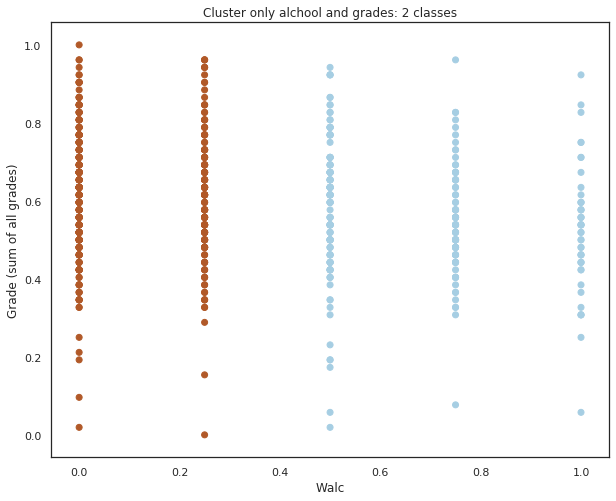

In [42]:
n_clusters = 2
clustered_data = KMeans(n_clusters=n_clusters).fit_predict(norm_data_filteredW)

plt.figure(figsize=(10,8))
plt.scatter(norm_data_filteredW[:,0], norm_data_filteredW[:,1], c=clustered_data, cmap='Paired')
plt.title(f"Cluster only alchool and grades: {n_clusters} classes")
plt.xlabel('Walc')
plt.ylabel('Grade (sum of all grades)')

Since consumtion of alcohol is given in categories, the clustering doesn't give good results.

Now we are going to try to reduce the number of dimentions before applying the KMeans algorithm.

Text(0, 0.5, 'Cumulative Explained Variance')

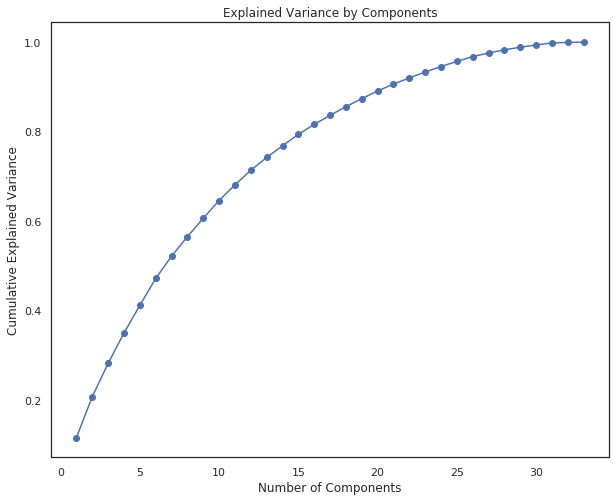

In [ ]:
pca = PCA()
plt.figure(figsize=(10, 8))
pca.fit(norm_data)
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(),
    marker='o')
plt.title("Explained Variance by Components")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
pca = PCA(n_components=20)
pca_norm_data = pca.fit_transform(norm_data)

(0, 2500)

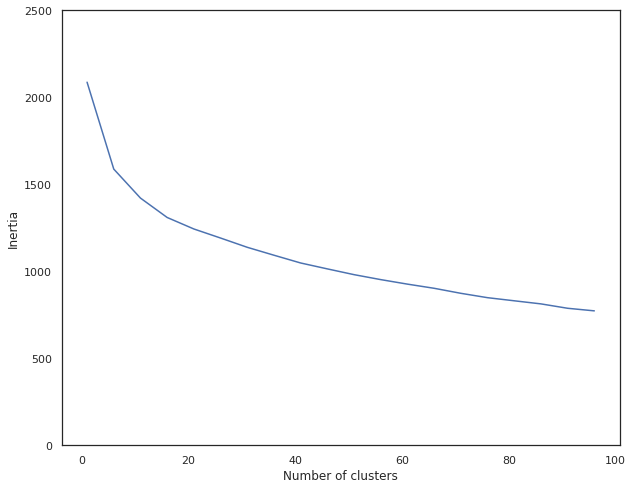

In [ ]:
max_clusters = 100
step = 5
inertia = []

for n_clusters in range(1,max_clusters+1, step):
    km = KMeans(n_clusters=n_clusters, init='k-means++')
    km.fit(pca_norm_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(10,8))
plt.plot(np.arange(1, max_clusters+1, step), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.ylim(ymin=0, ymax=2500)

Text(0.5, 1.0, 'Cluster with PCA: 10 classes')

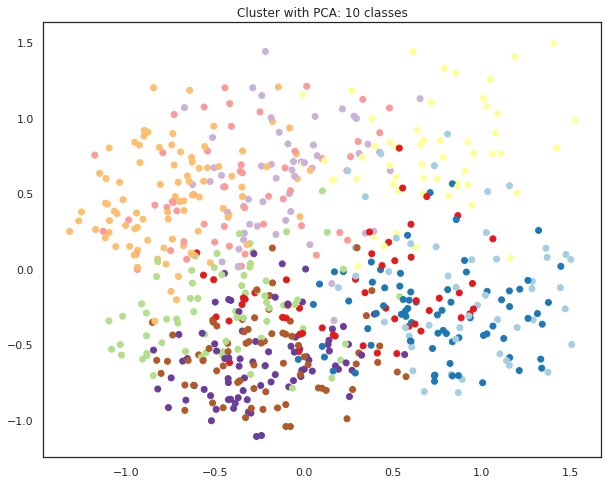

In [ ]:
n_clusters = 10
clustered_data = KMeans(n_clusters=n_clusters).fit_predict(pca_norm_data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(pca_norm_data)

plt.figure(figsize=(10,8))
plt.scatter(pca_data[:,0], pca_data[:,1], c=clustered_data, cmap='Paired')
plt.title(f"Cluster with PCA: {n_clusters} classes")

The results are very similar to the first case.

<h1>Forecasting</h1>

In [ ]:
data = pd.read_csv('data/Portuguese.csv')
data.replace(['GP','MS'], [0,1], inplace=True) #Gabriel Pereira=0, Mousinho da Silveira=1
data.replace(['M', 'F'], [0,1], inplace=True)  #Masculine = 0, Feminine = 1
data.replace(['U', 'R'], [0,1], inplace=True)  #Urban = 0, Rural = 1
data.replace(['LE3', 'GT3'], [0,1], inplace=True) # Family size - less or equal to 3 = 0, greater than 3 = 1
data.replace(['T','A'], [0,1], inplace=True)   # Parents living together = 0, apart = 1
data.replace(['teacher', 'health', 'services', 'at_home', 'other'], [0,1,2,3,4], inplace=True) #Parents working
data.replace(['home', 'reputation', 'course'], [0,1,2], inplace=True)
data.replace(['mother', 'father'], [0,1], inplace=True)
data.replace(['yes','no'],[0,1], inplace=True)  #Paid, activity, nursery, wants  higher education, internet and romantic
df = data.copy()
data['G'] = data[['G1', 'G2', 'G3']].mean(axis=1)
data.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)


In [ ]:
#Linear Regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data.drop('G', axis=1)
y = data['G']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
#Test all scalers
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler(), Normalizer()]
for scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    regr = LinearRegression().fit(X_train_scaled, y_train)
    y_reg = regr.predict(X_test_scaled)
    print(mean_squared_error(y_test, y_reg))
    print(mean_absolute_error(y_test, y_reg))

7.125899042030122
1.9912746092713731
7.125899042030125
1.9912746092713733
7.125899042030125
1.9912746092713731
6.967905140332467
1.9680997069648036


In [ ]:
#Test all scalers
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
X_train_scaled = Normalizer().fit_transform(X_train)
X_test_scaled = Normalizer().fit_transform(X_test)
X = Normalizer().fit_transform(X)

In [ ]:
#random search mlp regressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
regr = MLPRegressor(random_state=1, max_iter=1000)
#hiden size layers from 1 to 3 layers, each layer with 3 to 50 neurons
param_dist = {'hidden_layer_sizes': [(x,) for x in range(3,50)] + [(x,y) for x in range(3,50) for y in range(3,50)] + [(x,y,z) for x in range(3,50) for y in range(3,50) for z in range(3,50)],
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': uniform(0.0001, 0.1),
              'learning_rate_init': uniform(0.0001, 0.1),
              'learning_rate': ['constant', 'invscaling', 'adaptive']}
random_search = RandomizedSearchCV(regr, param_distributions=param_dist, n_iter=100, cv=10)
random_search.fit(X_train_scaled, y_train)
params = random_search.best_params_
mlp = MLPRegressor(**params, max_iter=1000)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)
print(random_search.best_params_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

{'activation': 'relu', 'alpha': 0.08902490004704912, 'hidden_layer_sizes': (35, 38, 15), 'learning_rate': 'invscaling', 'learning_rate_init': 0.013999580171456694, 'solver': 'adam'}
Mean squared error: 6.89
Mean absolute error: 1.91


In [ ]:
#xgboost
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
X_train_scaled = Normalizer().fit_transform(X_train)
X_test_scaled = Normalizer().fit_transform(X_test)
xgb_regr = xgb.XGBRegressor(random_state=1)
param_dist = {'n_estimators': randint(2, 1000),
                'max_depth': randint(1, 10),
                'learning_rate': uniform(0.01, 0.1),
                'subsample': uniform(0.5, 0.5),
                'colsample_bytree': uniform(0.5, 0.5),
                'gamma': uniform(0, 0.5),
                'reg_alpha': uniform(0, 1),
                'reg_lambda': uniform(0, 1)}
random_search = RandomizedSearchCV(xgb_regr, param_distributions=param_dist, n_iter=100, cv=10, random_state=1)
random_search.fit(X, y)
params = random_search.best_params_
xg = xgb.XGBRegressor(**params)
xg.fit(X_train_scaled, y_train)
y_pred = xg.predict(X_test_scaled)
print(random_search.best_params_)
print("Mean squared error: %.2f"
        % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
        % mean_absolute_error(y_test, y_pred))


{'colsample_bytree': 0.5536826514762136, 'gamma': 0.2549051390819664, 'learning_rate': 0.020213523253819303, 'max_depth': 2, 'n_estimators': 305, 'reg_alpha': 0.2317584645213333, 'reg_lambda': 0.9676679286512053, 'subsample': 0.6391594191051025}
Mean squared error: 6.73
Mean absolute error: 1.94


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(random_state=1)
param_dist = {'n_estimators': randint(2, 1000),
                'max_depth': randint(1, 10),
                'min_samples_split': randint(2, 10),
                'min_samples_leaf': randint(1, 10),
                'max_features': uniform(0.1, 0.9)}
random_search = RandomizedSearchCV(rf_regr, param_distributions=param_dist, n_iter=100, cv=10)
random_search.fit(X, y)
print(random_search.best_params_)
params = random_search.best_params_
rf_regr = RandomForestRegressor(random_state=1, n_estimators=params['n_estimators'], max_depth=params['max_depth'], min_samples_split=params['min_samples_split'], min_samples_leaf=params['min_samples_leaf'], max_features=params['max_features'])
rf_regr.fit(X_train_scaled, y_train)
y_pred = rf_regr.predict(X_test_scaled)
print("Mean squared error: %.2f"
        % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
        % mean_absolute_error(y_test, y_pred))

{'max_depth': 6, 'max_features': 0.2774804418607516, 'min_samples_leaf': 9, 'min_samples_split': 8, 'n_estimators': 222}
Mean squared error: 6.82
Mean absolute error: 1.95


In [ ]:
#SVM
from sklearn.svm import SVR
svr = SVR()
param_dist = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'degree': randint(1, 10),
                'gamma': ['scale', 'auto'],
                'C': uniform(0.1, 10),
                'epsilon': uniform(0.1, 10)}
#Creating randomizd search with MSE as scoring function
scoring = {'MSE': 'neg_mean_squared_error'}
random_search = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=100, cv=10)
random_search.fit(X, y)
params = random_search.best_params_
svr = SVR(kernel=params['kernel'], degree=params['degree'], gamma=params['gamma'], C=params['C'], epsilon=params['epsilon'])
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)
print(random_search.best_params_)
print("Mean squared error: %.2f"
        % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
        % mean_absolute_error(y_test, y_pred))

{'C': 8.770796113786393, 'degree': 7, 'epsilon': 0.48106651744755247, 'gamma': 'scale', 'kernel': 'linear'}
Mean squared error: 7.13
Mean absolute error: 1.99


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
param_dist = {'n_neighbors': randint(1, 100),
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size': randint(1, 100)}
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=100, cv=10)
random_search.fit(X, y)
params = random_search.best_params_
knn = KNeighborsRegressor(n_neighbors=params['n_neighbors'], weights=params['weights'], algorithm=params['algorithm'], leaf_size=params['leaf_size'])
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(random_search.best_params_)
print("Mean squared error: %.2f"
        % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
        % mean_absolute_error(y_test, y_pred))


{'algorithm': 'kd_tree', 'leaf_size': 92, 'n_neighbors': 23, 'weights': 'distance'}
Mean squared error: 7.52
Mean absolute error: 2.13


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=1)
param_dist = {'criterion': ['mse', 'friedman_mse', 'mae'],
                'splitter': ['best', 'random'],
                'max_depth': randint(1, 10),
                'min_samples_split': randint(2, 10),
                'min_samples_leaf': randint(1, 10),
                'max_features': uniform(0.1, 0.9)}
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=10)
random_search.fit(X, y)
params = random_search.best_params_
dt = DecisionTreeRegressor(random_state=1, criterion=params['criterion'], splitter=params['splitter'], max_depth=params['max_depth'], min_samples_split=params['min_samples_split'], min_samples_leaf=params['min_samples_leaf'], max_features=params['max_features'])
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
print(random_search.best_params_)
print("Mean squared error: %.2f"
        % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
        % mean_absolute_error(y_test, y_pred))

{'criterion': 'friedman_mse', 'max_depth': 4, 'max_features': 0.824783392276729, 'min_samples_leaf': 3, 'min_samples_split': 6, 'splitter': 'random'}
Mean squared error: 7.31
Mean absolute error: 2.05


In [ ]:
hp = {'colsample_bytree': 0.5536826514762136, 'gamma': 0.2549051390819664, 'learning_rate': 0.020213523253819303, 'max_depth': 2, 'n_estimators': 305, 'reg_alpha': 0.2317584645213333, 'reg_lambda': 0.9676679286512053, 'subsample': 0.6391594191051025}
xg = xgb.XGBRegressor(**hp)
xg.fit(X_train_scaled, y_train) 
y_pred = xg.predict(X_test_scaled)
print("Mean squared error: %.2f"
        % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
        % mean_absolute_error(y_test, y_pred))



Mean squared error: 6.73
Mean absolute error: 1.94


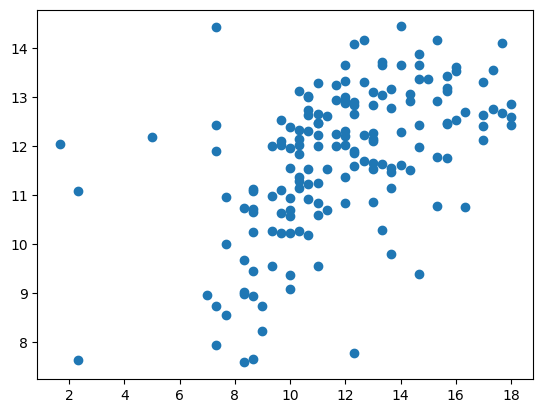

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test, y_pred, 'o')

In [ ]:
#Exclude variables with covariance < abs(0.1) with G
def exclude_by_covariance(df, target, threshold):
    cor = df.corr()
    cor_target = abs(cor[target])
    relevant_features = cor_target[cor_target>threshold]
    return df[relevant_features.index].drop(target, axis=1)
#corr = data.corr()
#corr.style.background_gradient(cmap='coolwarm')
#Get variables with covariance > abs(0.1) with G

Mean squared error: 6.73
Mean absolute error: 1.94


Mean squared error: 7.17
Mean absolute error: 1.97


Mean squared error: 7.30
Mean absolute error: 1.99


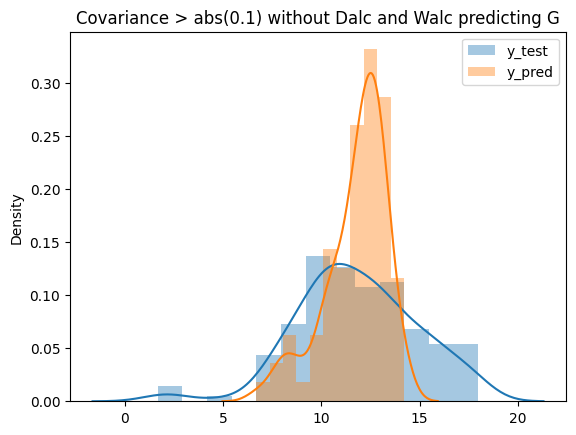

Mean squared error: 2.61
Mean absolute error: 1.08


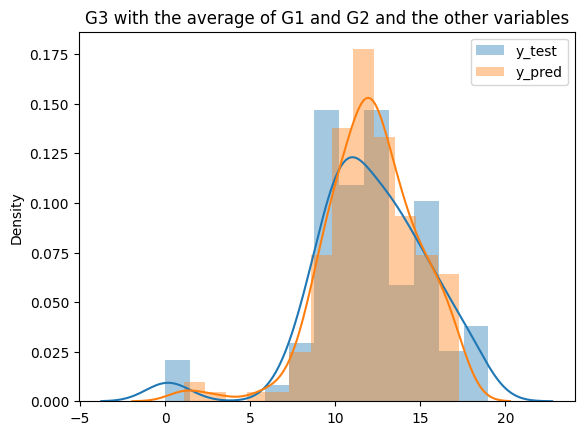

In [ ]:
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
X = data.drop(['G'], axis=1)
X = exclude_by_covariance(data, 'G', 0)
y = data['G']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Make the prediction for all variables
hp = {'colsample_bytree': 0.5536826514762136, 'gamma': 0.2549051390819664, 'learning_rate': 0.020213523253819303, 'max_depth': 2, 'n_estimators': 305, 'reg_alpha': 0.2317584645213333, 'reg_lambda': 0.9676679286512053, 'subsample': 0.6391594191051025}
xg = xgb.XGBRegressor(**hp)
xg.fit(X_train_scaled, y_train) 
y_pred = xg.predict(X_test_scaled)
print("Mean squared error: %.2f"
        % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
        % mean_absolute_error(y_test, y_pred))

sns.distplot(y_test.values, label='y_test')
sns.distplot(y_pred, label='y_pred')
plt.title('All variables predicting G')
plt.legend()
plt.show()

#Prediction for covariance > abs(0.1) with G
X = exclude_by_covariance(data, 'G', 0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
xg.fit(X_train_scaled, y_train)
y_pred = xg.predict(X_test_scaled)
print("Mean squared error: %.2f"
        % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
        % mean_absolute_error(y_test, y_pred))

sns.distplot(y_test.values, label='y_test')
sns.distplot(y_pred, label='y_pred')
plt.title('Covariance > abs(0.1) predicting G')
plt.legend()
plt.show()

#Prediction without variables Dalc and Walc
X = exclude_by_covariance(data, 'G', 0.1)
X = X.drop(['Dalc', 'Walc'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
xg.fit(X_train_scaled, y_train)
y_pred = xg.predict(X_test_scaled)
print("Mean squared error: %.2f"
        % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
        % mean_absolute_error(y_test, y_pred))

sns.distplot(y_test.values, label='y_test')
sns.distplot(y_pred, label='y_pred')
plt.title('Covariance > abs(0.1) without Dalc and Walc predicting G')
plt.legend()
plt.show()
#Predicting G3 with the average of G1 and G2 and the other variables
df['G'] = (df['G1'] + df['G2'])/2
X = df.drop(['G1', 'G2', 'G3'], axis=1)
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
xg.fit(X_train_scaled, y_train)
y_pred = xg.predict(X_test_scaled)
print("Mean squared error: %.2f"
        % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
        % mean_absolute_error(y_test, y_pred))

sns.distplot(y_test.values, label='y_test')
sns.distplot(y_pred, label='y_pred')
plt.title('G3 with the average of G1 and G2 and the other variables')
plt.legend()
plt.show()


In [ ]:
exclude_by_covariance(data, 'G', 0.05)

school  sex  age  address  Medu  Fedu  Mjob  Fjob  reason  guardian  ...  \
0         0    1   18        0     4     4     3     0       2         0  ...   
1         0    1   17        0     1     1     3     4       2         1  ...   
2         0    1   15        0     1     1     3     4       4         0  ...   
3         0    1   15        0     4     2     1     2       0         0  ...   
4         0    1   16        0     3     3     4     4       0         1  ...   
..      ...  ...  ...      ...   ...   ...   ...   ...     ...       ...  ...   
644       1    1   19        1     2     3     2     4       2         0  ...   
645       1    1   18        0     3     1     0     2       2         0  ...   
646       1    1   18        0     1     1     4     4       2         0  ...   
647       1    0   17        0     3     1     2     2       2         0  ...   
648       1    0   18        1     3     2     2     4       2         0  ...   

     higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  \
0         0         1         1       4         3      4     1     1       3   
1         0         0         1       5         3      3     1     1       3   
2         0         0         1       4         3      2     2     3       3   
3         0         0         0       3         2      2     1     1       5   
4         0         1         1       4         3      2     1     2       5   
..      ...       ...       ...     ...       ...    ...   ...   ...     ...   
644       0         0         1       5         4      2     1     2       5   
645       0         0         1       4         3      4     1     1       1   
646       0         1         1       1         1      1     1     1       5   
647       0         0         1       2         4      5     3     4       2   
648       0         0         1       4         4      1     3     4       5   

     absences  
0           4  
1           2  
2           6  
3           0  
4           0  
..        ...  
644         4  
645         4  
646         6  
647         6  
648         4  

[649 rows x 26 columns]

In [ ]:
data.corr()

school       sex       age   address   famsize   Pstatus  \
school      1.000000  0.083050  0.087170  0.354520 -0.022252 -0.028120   
sex         0.083050  1.000000  0.043662  0.025503  0.098205  0.064700   
age         0.087170  0.043662  1.000000  0.025848  0.002470  0.005631   
address     0.354520  0.025503  0.025848  1.000000  0.046113 -0.094635   
famsize    -0.022252  0.098205  0.002470  0.046113  1.000000 -0.239608   
Pstatus    -0.028120  0.064700  0.005631 -0.094635 -0.239608  1.000000   
Medu       -0.254787 -0.119127 -0.107832 -0.190320  0.014325  0.057174   
Fedu       -0.209806 -0.083913 -0.121050 -0.141493  0.039538  0.031856   
Mjob        0.151608  0.114223  0.096202  0.128512  0.059604  0.025812   
Fjob        0.018211  0.054325  0.094789  0.069587 -0.045834  0.057947   
reason      0.266147  0.014094  0.013001  0.157734  0.058012 -0.065560   
guardian    0.011635 -0.006472  0.262366  0.032634  0.019440  0.051001   
traveltime  0.252936 -0.040880  0.034490  0.344902 -0.012794 -0.040633   
studytime  -0.137857  0.206214 -0.008415 -0.062023  0.010945  0.008748   
failures    0.113788 -0.073888  0.319968  0.063824  0.066068  0.009881   
schoolsup   0.123340 -0.111202  0.167841  0.017956 -0.056405 -0.009456   
famsup      0.063720 -0.129467  0.101894  0.005577 -0.039819  0.010203   
paid        0.007905  0.079300  0.005458 -0.030483 -0.050253  0.015923   
activities  0.088604  0.124707  0.054279 -0.009278 -0.014790  0.101555   
nursery    -0.004659 -0.043603  0.021441  0.018077  0.100686 -0.032724   
higher      0.136112 -0.058134  0.265497  0.076706  0.004523  0.022726   
internet    0.240486  0.065911 -0.013115  0.175794  0.013357  0.059754   
romantic   -0.072241 -0.110144 -0.178810 -0.030939 -0.032936 -0.053828   
famrel     -0.031597 -0.083473 -0.020559  0.033897 -0.004641 -0.051303   
freetime    0.034666 -0.146305 -0.004910  0.036647  0.021257 -0.037585   
goout       0.044632 -0.058178  0.112805 -0.015475  0.004312 -0.031086   
Dalc        0.047169 -0.282696  0.134768  0.047304 -0.060482 -0.041513   
Walc        0.014169 -0.320785  0.086357  0.012416 -0.081958 -0.070976   
health     -0.058599 -0.139547 -0.008750 -0.003787 -0.002448 -0.012638   
absences   -0.163933 -0.021336  0.149998 -0.073653 -0.004645  0.117492   
G          -0.295035  0.118333 -0.133499 -0.167455 -0.045694 -0.011045   

                Medu      Fedu      Mjob      Fjob  ...  internet  romantic  \
school     -0.254787 -0.209806  0.151608  0.018211  ...  0.240486 -0.072241   
sex        -0.119127 -0.083913  0.114223  0.054325  ...  0.065911 -0.110144   
age        -0.107832 -0.121050  0.096202  0.094789  ... -0.013115 -0.178810   
address    -0.190320 -0.141493  0.128512  0.069587  ...  0.175794 -0.030939   
famsize     0.014325  0.039538  0.059604 -0.045834  ...  0.013357 -0.032936   
Pstatus     0.057174  0.031856  0.025812  0.057947  ...  0.059754 -0.053828   
Medu        1.000000  0.647477 -0.536829 -0.236021  ... -0.266052  0.030992   
Fedu        0.647477  1.000000 -0.376360 -0.363574  ... -0.183483  0.067675   
Mjob       -0.536829 -0.376360  1.000000  0.313979  ...  0.206238 -0.059196   
Fjob       -0.236021 -0.363574  0.313979  1.000000  ...  0.022623 -0.003189   
reason     -0.091811 -0.057348 -0.013613 -0.086771  ...  0.112354 -0.041911   
guardian   -0.115260 -0.028207  0.142149  0.047097  ... -0.028168 -0.102655   
traveltime -0.265079 -0.208288  0.143728  0.102847  ...  0.190826 -0.004751   
studytime   0.097006  0.050400 -0.027832 -0.037830  ... -0.037529 -0.033036   
failures   -0.172210 -0.165915  0.089040  0.083033  ...  0.095330 -0.069901   
schoolsup   0.022168 -0.023572 -0.063127  0.046903  ... -0.025942 -0.094310   
famsup     -0.120491 -0.135191  0.092705  0.063976  ...  0.071891 -0.023398   
paid       -0.113973 -0.094628  0.022049 -0.027030  ...  0.031823 -0.018309   
activities -0.119354 -0.079700  0.118474  0.057043  ...  0.082375  0.057517   
nursery    -0.125951 -0.074863  0.107690  0.011730  ... -0.007159

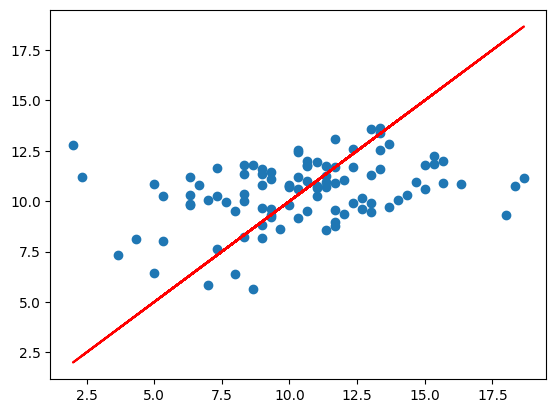

In [ ]:
plt.plot(y_test.values, y_pred, 'o')
plt.plot(y_test.values, y_test, 'r')

0.026696984258528282

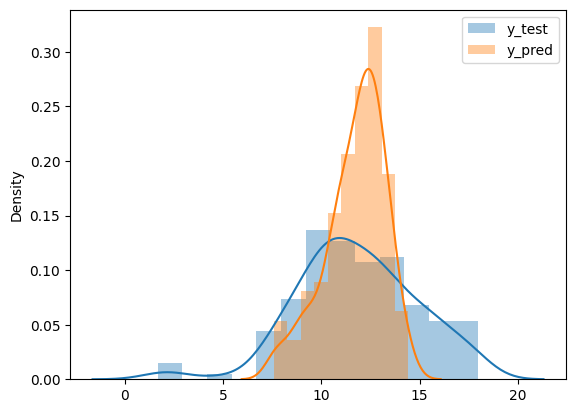

In [ ]:
#Estimate distribution of y_test and y_pred
import seaborn as sns
sns.distplot(y_test.values, label='y_test')
sns.distplot(y_pred, label='y_pred')
plt.title('All variables predicting G')
plt.legend()

#Estimate KL divergence between y_test and y_pred
#from scipy.stats import entropy
#entropy(y_test.values, y_pred)



# Hypotesis Testing

In [12]:
# Compute mean through Bootstrap Sampling
def Bootstrap_mean(df, n=5000, size=None):
    if size is None:
        size = len(df)
    values = np.zeros(n)
    for i in range(n):
        sample = df.sample(size, replace=True)
        values[i] = sample.mean()
    return values

# Compute confidence Interval
def IC(df, n=5000, size=None):
    values = Bootstrap_mean(df, n, size)
    return (np.percentile(values, 5), np.percentile(values, 95))

# Statistic difference of means for Permutation test
def Statistic(df):
    hi = df.alc==True
    lo = df.alc==False
    return df[lo].grades.mean()-df[hi].grades.mean()

In [13]:
# Compute tests and generate graphics for a discipline
def Tests(data):

    # Compute distribution of grades for high and low groups of consumption on week and workdays
    figure, axis = plt.subplots(1, 2,figsize=(14,5))
    def plt_dist(data, axis, col, wd="workday"):
        hi = data[col]>=3
        lo = data[col]<3
        grades = data[["G1","G2","G3"]].mean(1)
        high = grades[hi].copy()
        low = grades[lo].copy()
        axis.hist(high, bins=10,alpha=0.3, edgecolor='k', label='high '+wd +' consumption',density=True, color='black')
        axis.hist(low, bins=10,alpha=0.3, edgecolor='k', label='low '+wd +' consumption',density=True,color='lightgray')
        axis.legend()
        axis.set_xlabel("average grades")
        return high,low
    high,low = plt_dist(data, axis[0], 'Dalc')
    high2,low2 = plt_dist(data, axis[1], 'Walc', 'weekend')
    plt.show()

    # PLot Boxplot and Compute Confidence Intervals of grades for high and low consumption on weekends and workdays
    def plot_box(high,low, axis, wd="workday"):
        samples_true = Bootstrap_mean(high)
        samples_false = Bootstrap_mean(low)
        to_plot = pd.DataFrame()
        to_plot['high '+wd +' consumption'] = samples_true
        to_plot['low '+wd +' consumption'] = samples_false
        to_plot.boxplot(grid=False, ax=axis, sym='', whis=[5, 95], showmeans=True, color='black')
        print("Confidence Iniervals for high and low "+wd+" consumptions: ",IC(high), IC(low))
        ic1 = IC(high)
        ic2 = IC(low)
        y0 = min(ic1[0],ic2[0])-0.25
        y1 = max(ic1[1],ic2[1])+0.25
        axis.set_ylim(y0, y1)
        axis.set_ylabel('Mean')
    figure, axis = plt.subplots(1, 2,figsize=(12,4.5))
    plot_box(high,low, axis[0])  
    plot_box(high2,low2, axis[1], "weekend")  
    plt.show()

    # Permutation Test of difference of means between groups
    def plt_perm(data, axis, col):
        data1 = pd.DataFrame()
        grades = data[["G1","G2","G3"]].mean(1)
        data1["grades"] = grades
        data1["alc"] = data[col]>=3
        data2 = data1.copy()
        n = 5000
        k=0
        values = np.zeros(n)
        for i in range(n):
            np.random.shuffle(data1.alc.values)
            values[i] = Statistic(data1)
        k+=1
        axis.hist(values, bins=30, edgecolor='k', color="lightgray")#density=True,
        axis.plot([Statistic(data2)], [0], 'o', ms=12,color='black', label = 'original difference of means')
        axis.set_ylabel('Number of samples')
        axis.set_xlabel("Difference of means for "+str(n)+" premutations")
        axis.legend()
    figure, axis = plt.subplots(1, 2,figsize=(14,4.5))
    plt_perm(data, axis[0], 'Dalc')    
    plt_perm(data, axis[1], 'Walc')
    plt.show()

Confidence Iniervals for high and low workday consumptions:  (9.826839826839826, 10.770562770562773) (11.610693473193473, 11.997698135198135)
Confidence Iniervals for high and low weekend consumptions:  (10.780423280423284, 11.365079365079362) (11.753148614609572, 12.209068010075564)


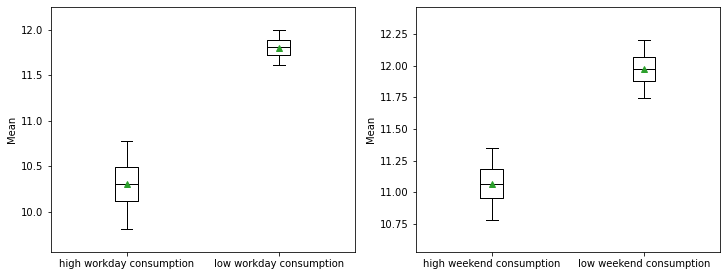

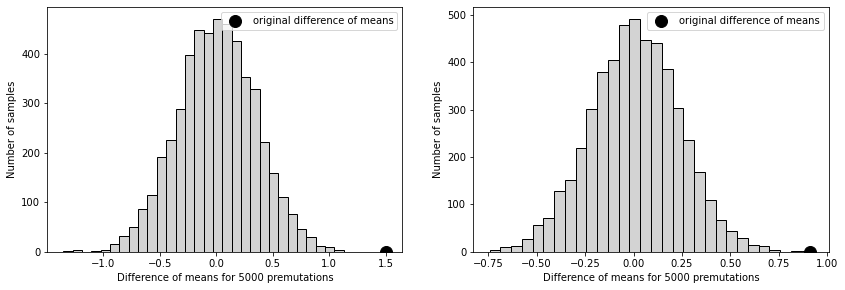

In [14]:
data = pd.read_csv('data/Portuguese.csv')
Tests(data)

Confidence Iniervals for high and low workday consumptions:  (9.78030303030303, 11.0530303030303) (10.370370370370377, 11.049382716049376)
Confidence Iniervals for high and low weekend consumptions:  (9.974842767295597, 10.825995807127878) (10.439265536723168, 11.302259887005647)


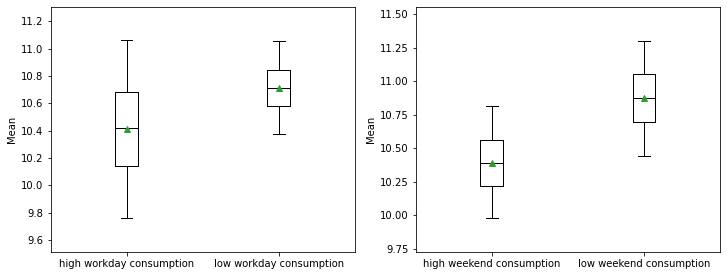

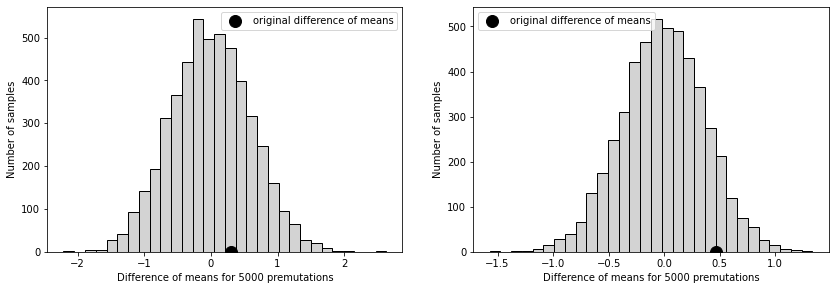

In [15]:
data = pd.read_csv('data/Maths.csv')
Tests(data)